In [2]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-2-108091f10927>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [10]:
#Upload do arquivo
from google.colab import files
aqr = files.upload()

Saving 50000 Sales Records.csv to 50000 Sales Records.csv


In [11]:
#criando dataframe
df = pd.read_csv("/content/50000 Sales Records.csv")

In [12]:
#5 primeiras linhas
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [13]:
#quantidade linhas e colunas
df.shape

(50000, 14)

In [16]:
#data types do dataframe
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [19]:
#receita total
df['Total Revenue'].sum()

66185806881.22001

In [20]:
#custo total
df["Total Cost"].sum()

46657869932.97

In [21]:
#lucro total
df["Lucro"] = df["Total Revenue"] - df["Total Cost"]

In [27]:
df["Lucro"].sum()

19527936948.25

In [28]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Lucro
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25,174965.25


In [36]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [37]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [42]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
Lucro                    float64
Order date        datetime64[ns]
Ship date         datetime64[ns]
dtype: object

In [46]:
df["tempo_envio"] = (df["Ship Date"] - df["Order Date"]).dt.days

In [47]:
df.head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Lucro,Order date,Ship date,tempo_envio
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,897751939,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16,597290.92,597290.92,2015-08-31,2015-10-12,42


In [48]:
#media do tempo de envio por canal
df.groupby("Sales Channel")["tempo_envio"].mean()

Sales Channel
Offline    24.896700
Online     25.112407
Name: tempo_envio, dtype: float64

In [49]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Lucro             0
Order date        0
Ship date         0
tempo_envio       0
dtype: int64

In [58]:
# lucro por ano e por canal de venda
df.groupby([df["Order Date"].dt.year, "Sales Channel"])["Lucro"].sum()

Order Date  Sales Channel
2010        Offline             1,266,615,982.07
            Online              1,269,849,784.35
2011        Offline             1,300,137,354.28
            Online              1,322,477,805.96
2012        Offline             1,249,357,187.61
            Online              1,308,818,006.81
2013        Offline             1,267,503,062.11
            Online              1,297,688,358.85
2014        Offline             1,322,249,844.03
            Online              1,273,193,566.10
2015        Offline             1,274,093,759.69
            Online              1,317,191,135.46
2016        Offline             1,285,921,827.16
            Online              1,304,248,411.15
2017        Offline               778,297,833.69
            Online                690,293,028.93
Name: Lucro, dtype: float64

In [57]:
pd.options.display.float_format = '{:20,.2f}'.format

In [59]:
#resetando o index
lucro_ano = df.groupby([df["Order Date"].dt.year, "Sales Channel"])["Lucro"].sum().reset_index()

In [60]:
lucro_ano

,Order Date,Sales Channel,Lucro
0,2010,Offline,"1,266,615,982.07"
1,2010,Online,"1,269,849,784.35"
2,2011,Offline,"1,300,137,354.28"
3,2011,Online,"1,322,477,805.96"
4,2012,Offline,"1,249,357,187.61"
5,2012,Online,"1,308,818,006.81"
6,2013,Offline,"1,267,503,062.11"
7,2013,Online,"1,297,688,358.85"
8,2014,Offline,"1,322,249,844.03"
9,2014,Online,"1,273,193,566.10"


In [61]:
#total de vendas por categoria
df.groupby("Item Type")["Units Sold"].sum().sort_values(ascending=False)

Item Type
Personal Care      21372028
Fruits             21192242
Vegetables         20962711
Cosmetics          20942290
Meat               20932070
Beverages          20929239
Snacks             20861104
Clothes            20720871
Office Supplies    20645301
Cereal             20597431
Household          20535806
Baby Food          20289856
Name: Units Sold, dtype: int64

Text(0, 0.5, 'Categoria')

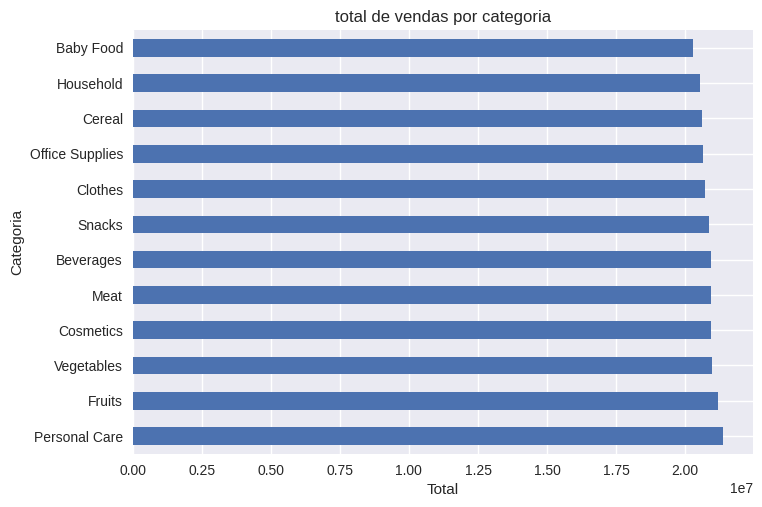

In [62]:
#grafico total de vendas por categoria
df.groupby("Item Type")["Units Sold"].sum().sort_values(ascending=False).plot.barh(title="total de vendas por categoria")
plt.xlabel("Total")
plt.ylabel("Categoria")

Text(0, 0.5, 'Receita')

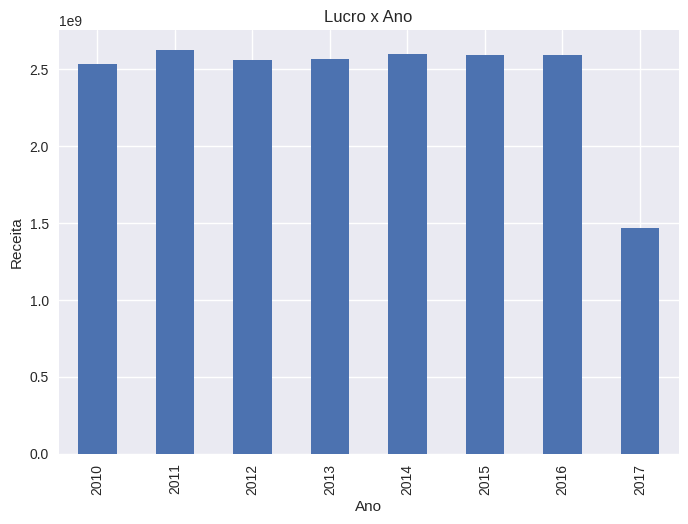

In [63]:
#lucro por ano
df.groupby(df["Order date"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [66]:
#vendas de 2010
df_2010 = df[df["Order Date"].dt.year == 2010]

In [67]:
df_2010.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Lucro,Order date,Ship date,tempo_envio
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,599480426,2011-01-09,8435,255.28,159.42,"2,153,286.80","1,344,707.70","808,579.10","808,579.10",2010-11-20,2011-01-09,50
4,Europe,Malta,Cereal,Online,M,2010-08-12,626391351,2010-09-13,1975,205.70,117.11,"406,257.50","231,292.25","174,965.25","174,965.25",2010-08-12,2010-09-13,32
5,Asia,Indonesia,Meat,Online,H,2010-08-20,472974574,2010-08-27,2542,421.89,364.69,"1,072,444.38","927,041.98","145,402.40","145,402.40",2010-08-20,2010-08-27,7
12,Asia,India,Vegetables,Online,C,2010-03-21,897317636,2010-04-05,5084,154.06,90.93,"783,241.04","462,288.12","320,952.92","320,952.92",2010-03-21,2010-04-05,15
13,Middle East and North Africa,Lebanon,Vegetables,Online,L,2010-10-15,660954082,2010-11-19,9855,154.06,90.93,"1,518,261.30","896,115.15","622,146.15","622,146.15",2010-10-15,2010-11-19,35


Text(0, 0.5, 'Lucro')

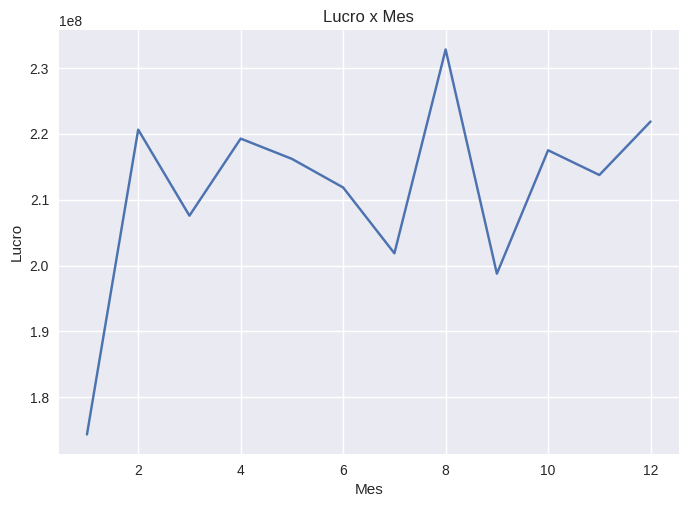

In [70]:
# grafico de linhas com lucro por mes
df_2010.groupby(df_2010["Order Date"].dt.month)["Lucro"].sum().plot(title="Lucro x Mes")
plt.xlabel("Mes")
plt.ylabel("Lucro")

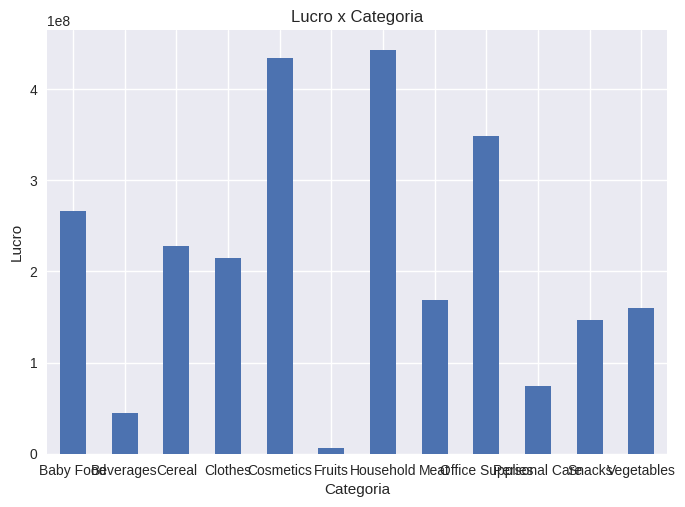

In [74]:
df_2010.groupby("Item Type")["Lucro"].sum().plot.bar(title="Lucro x Categoria")
plt.xlabel("Categoria")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

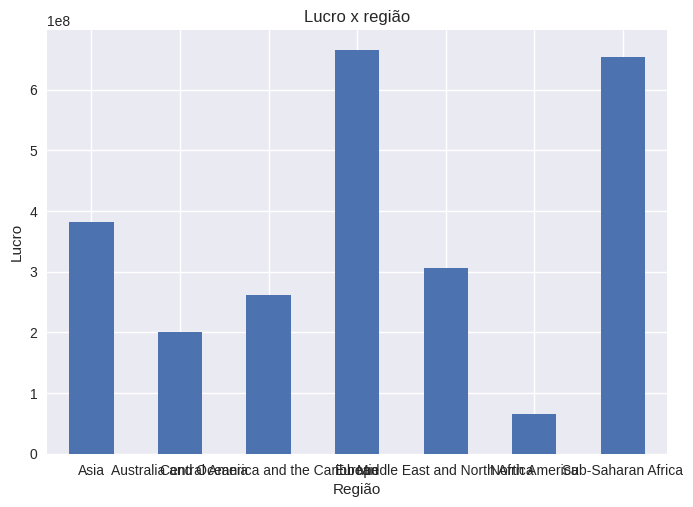

In [75]:
#Lucro por regiao
df_2010.groupby("Region")["Lucro"].sum().plot.bar(title="Lucro x região")
plt.xlabel("Região")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [78]:
df["tempo_envio"].describe()

count              50,000.00
mean                   25.00
std                    14.69
min                     0.00
25%                    12.00
50%                    25.00
75%                    38.00
max                    50.00
Name: tempo_envio, dtype: float64

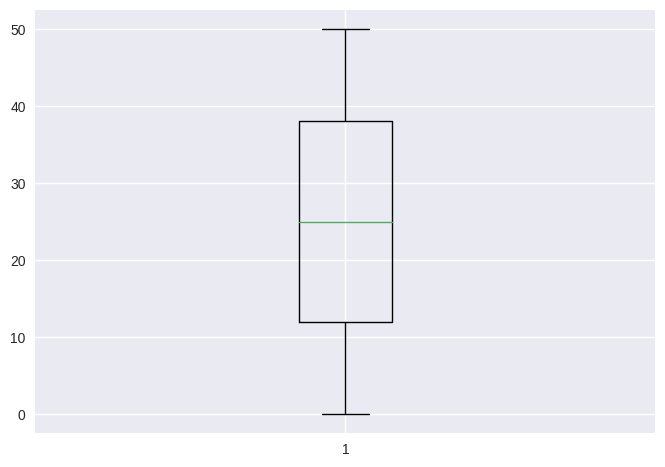

In [77]:
#grafico de boxplot
plt.boxplot(df["tempo_envio"]);

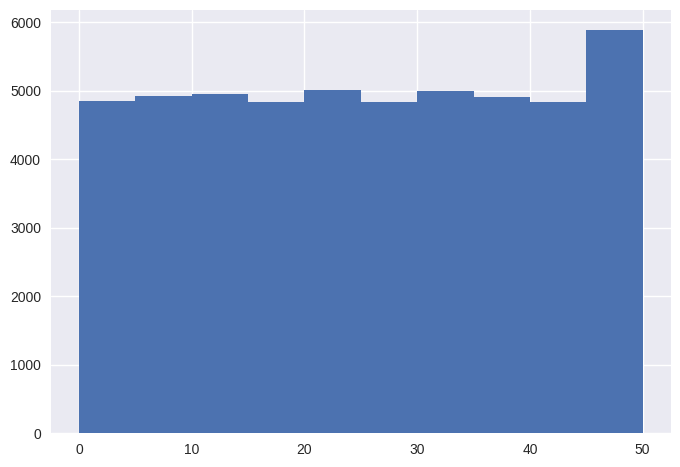

In [80]:
#Histtograma
plt.hist(df["tempo_envio"]);

In [79]:
# tempo minimo de envio
df["tempo_envio"].min()

0

In [81]:
# tempo maximo de envio
df["tempo_envio"].max()

50

In [82]:
# identificando outlier
df[df["tempo_envio"] == 20]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Lucro,Order date,Ship date,tempo_envio
51,Australia and Oceania,Samoa,Vegetables,Offline,H,2011-01-18,961501395,2011-02-07,8484,154.06,90.93,"1,307,045.04","771,450.12","535,594.92","535,594.92",2011-01-18,2011-02-07,20
146,Middle East and North Africa,Jordan,Household,Offline,L,2014-11-22,650594747,2014-12-12,4298,668.27,502.54,"2,872,224.46","2,159,916.92","712,307.54","712,307.54",2014-11-22,2014-12-12,20
388,Europe,Czech Republic,Snacks,Offline,L,2015-02-20,756634271,2015-03-12,3750,152.58,97.44,"572,175.00","365,400.00","206,775.00","206,775.00",2015-02-20,2015-03-12,20
468,Sub-Saharan Africa,Rwanda,Personal Care,Offline,L,2013-03-06,956619775,2013-03-26,3904,81.73,56.67,"319,073.92","221,239.68","97,834.24","97,834.24",2013-03-06,2013-03-26,20
471,Europe,Greece,Cosmetics,Online,M,2015-08-11,145342528,2015-08-31,8939,437.20,263.33,"3,908,130.80","2,353,906.87","1,554,223.93","1,554,223.93",2015-08-11,2015-08-31,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49610,Sub-Saharan Africa,Senegal,Household,Online,M,2015-03-04,448580205,2015-03-24,3706,668.27,502.54,"2,476,608.62","1,862,413.24","614,195.38","614,195.38",2015-03-04,2015-03-24,20
49650,Europe,Bosnia and Herzegovina,Vegetables,Online,H,2017-07-23,923206746,2017-08-12,6247,154.06,90.93,"962,412.82","568,039.71","394,373.11","394,373.11",2017-07-23,2017-08-12,20
49812,Sub-Saharan Africa,Eritrea,Vegetables,Offline,L,2012-03-09,831897485,2012-03-29,5807,154.06,90.93,"894,626.42","528,030.51","366,595.91","366,595.91",2012-03-09,2012-03-29,20
49911,Asia,Japan,Clothes,Online,M,2016-08-14,418366515,2016-09-03,2804,109.28,35.84,"306,421.12","100,495.36","205,925.76","205,925.76",2016-08-14,2016-09-03,20


In [83]:
df.to_csv("df_vendas_novo.csv", index=False)